In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# wine data를 활용해서 KNN과 DT 성능 비교하기

In [5]:
df_wine = pd.read_csv('https://bit.ly/wine-date')
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [23]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


In [7]:
df_wine["class"].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

In [21]:
# datatype 변경하기
df_wine["class"] = df_wine["class"].astype("int32").astype("category")

In [24]:
df_wine["class"].value_counts()

class
1    4898
0    1599
Name: count, dtype: int64

## Data 살펴보기

In [11]:
## Summary statistic
df_wine_group = df_wine.groupby("class", observed = True)
df_wine_group.describe()

for idx, data in df_wine_group:
    print("class = ", idx)
    print(data.describe())
    print("="*50)

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


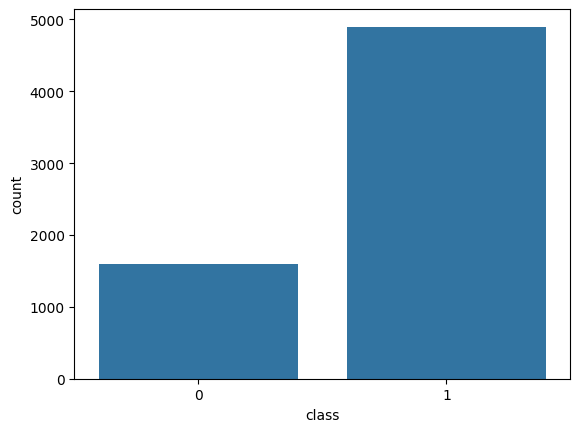

In [18]:
## Visualization
sns.countplot(df_wine, x = "class")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

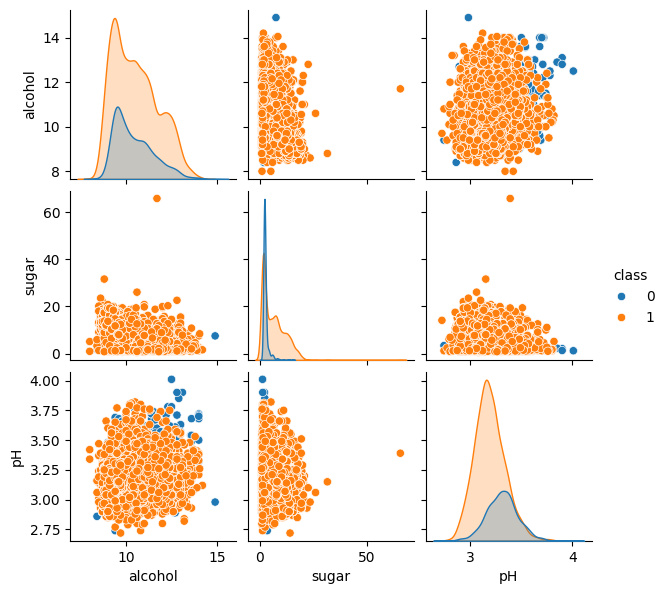

In [25]:
# Visualization
sns.pairplot(df_wine, hue="class", height = 2)
plt.show

## Feature와 Target 분리

In [26]:
X = df_wine.drop(columns='class') 
y = df_wine['class']

In [27]:
## test split library
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train.shape)

(4547, 3)


## 표준화 진행

In [29]:
## 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

train_scaled = (X_train - mean)/std
test_scaled = (X_test - mean) / std

## KNN 사용

In [32]:
## knn class
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5
                           , weights = "uniform"
                           , metric = "minkowski"
                           , p = 2
                           )
knn.fit(train_scaled, y_train)

KNeighborsClassifier()

In [35]:
print("Test ACC = ", knn.score(test_scaled, y_test))

Test ACC =  0.8574358974358974


In [36]:
## GridSearch
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0 : 
        knn.n_neighbors = n
        knn.fit(train_scaled, y_train)
        score = knn.score(test_scaled, y_test)
        score_list.append(score)
        n_list.append(n)


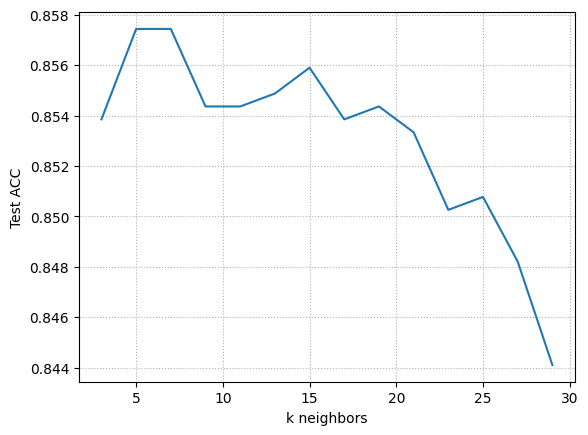

In [37]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

In [38]:
# k = 5일때 가장 좋은 acc가 나옴
# so, 추가적인 튜닝 진행하지 않고, 기존 acc = 0.85로 결과 산출

## DT 사용

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8615384615384616